In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [2]:
df_ti_train=pd.read_csv("C:/Users/Augustin/Desktop/Dorset 23/DIA/Titanic/train.csv")
df_ti_test=pd.read_csv("C:/Users/Augustin/Desktop/Dorset 23/DIA/Titanic/test.csv")
df_ti_test_res=pd.read_csv("C:/Users/Augustin/Desktop/Dorset 23/DIA/Titanic/gender_submission.csv")

In [3]:
print(df_ti_train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
df_ti_1=df_ti_train.drop("PassengerId", axis=1)
df_ti_1=df_ti_1.drop("Ticket", axis=1)
df_ti_2=df_ti_test.copy()
df_ti_2=df_ti_2.drop("Ticket", axis=1)

In [5]:
print(df_ti_1['Cabin'].head(100))
print("_____________________________")
print(df_ti_2.head(10))

0         NaN
1         C85
2         NaN
3        C123
4         NaN
       ...   
95        NaN
96         A5
97    D10 D12
98        NaN
99        NaN
Name: Cabin, Length: 100, dtype: object
_____________________________
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5          897       3                    Svensson, Mr. Johan Cervin    male   
6          898       3                          Connolly, Miss. Kate  female   
7          899       2                  Caldwell, Mr. Albert Francis    male   
8          900       3     Abrahim, Mrs. Joseph (Sophie 

In [6]:
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
df_ti_1['Cabin']=df_ti_1['Cabin'].fillna('U0')
df_ti_2['Cabin']=df_ti_2['Cabin'].fillna('U0')
print(df_ti_1['Cabin'].head(100))
print(df_ti_2['Cabin'].head(100))

0          U0
1         C85
2          U0
3        C123
4          U0
       ...   
95         U0
96         A5
97    D10 D12
98         U0
99         U0
Name: Cabin, Length: 100, dtype: object
0      U0
1      U0
2      U0
3      U0
4      U0
     ... 
95     U0
96    C46
97     U0
98     U0
99     U0
Name: Cabin, Length: 100, dtype: object


In [7]:
import re
df_ti_1['Deck'] = df_ti_1['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group() if re.compile("([a-zA-Z]+)").search(x) else 'U')
df_ti_1['Deck'] = df_ti_1['Deck'].map(deck)
df_ti_1['Deck'] = df_ti_1['Deck'].fillna(0)
df_ti_1['Deck'] = df_ti_1['Deck'].astype(int)

df_ti_2['Deck'] = df_ti_2['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group() if re.compile("([a-zA-Z]+)").search(x) else 'U')
df_ti_2['Deck'] = df_ti_2['Deck'].map(deck)
df_ti_2['Deck'] = df_ti_2['Deck'].fillna(0)
df_ti_2['Deck'] = df_ti_2['Deck'].astype(int)

In [8]:
df_ti_1=df_ti_1.drop("Cabin", axis=1)
df_ti_2=df_ti_2.drop("Cabin", axis=1)

In [9]:
print(df_ti_1.head())
print(df_ti_2.head())

   Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch     Fare Embarked  Deck  
0    male  22.0      1      0   7.2500        S     8  
1  female  38.0      1      0  71.2833        C     3  
2  female  26.0      0      0   7.9250        S     8  
3  female  35.0      1      0  53.1000        S     3  
4    male  35.0      0      0   8.0500        S     8  
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ell

In [10]:
print(null_age_1:=df_ti_1[df_ti_1['Age'].isnull()])
print(nb_null_age_1:=int(null_age_1.shape[0]))
print(null_age_2:=df_ti_2[df_ti_2['Age'].isnull()])
print(nb_null_age_2:=int(null_age_2.shape[0]))

     Survived  Pclass                                      Name     Sex  Age  \
5           0       3                          Moran, Mr. James    male  NaN   
17          1       2              Williams, Mr. Charles Eugene    male  NaN   
19          1       3                   Masselmani, Mrs. Fatima  female  NaN   
26          0       3                   Emir, Mr. Farred Chehab    male  NaN   
28          1       3             O'Dwyer, Miss. Ellen "Nellie"  female  NaN   
..        ...     ...                                       ...     ...  ...   
859         0       3                          Razi, Mr. Raihed    male  NaN   
863         0       3         Sage, Miss. Dorothy Edith "Dolly"  female  NaN   
868         0       3               van Melkebeke, Mr. Philemon    male  NaN   
878         0       3                        Laleff, Mr. Kristo    male  NaN   
888         0       3  Johnston, Miss. Catherine Helen "Carrie"  female  NaN   

     SibSp  Parch     Fare Embarked  De

In [11]:
mean=df_ti_1["Age"].mean()
std=df_ti_1["Age"].std()
rand_ages_1=np.random.randint(mean-std, mean+std, size=nb_null_age_1)
print(rand_ages_1)
mean=df_ti_2["Age"].mean()
std=df_ti_2["Age"].std()
rand_ages_2=np.random.randint(mean-std, mean+std, size=nb_null_age_2)
print(rand_ages_2)

[40 15 40 20 36 25 33 25 33 35 35 20 20 18 34 40 38 27 21 25 36 23 24 39
 33 29 17 38 33 25 37 31 27 23 37 35 36 32 15 40 22 26 24 21 31 43 18 21
 38 17 43 28 32 31 36 19 20 29 40 32 25 42 19 30 36 34 35 15 36 21 30 34
 39 16 40 25 40 33 24 34 40 39 36 37 25 25 20 28 35 41 43 23 17 38 24 41
 39 41 35 39 16 36 29 42 24 41 32 39 37 27 31 32 27 16 24 15 37 17 42 40
 38 31 22 29 28 33 31 41 42 34 30 43 21 30 38 24 32 20 34 35 41 21 23 29
 15 38 24 29 31 30 43 31 19 23 18 23 32 20 19 35 36 22 39 21 22 35 42 24
 42 33 24 42 42 18 34 24 32]
[31 36 36 30 41 18 17 22 41 21 28 32 22 16 37 29 30 41 40 18 28 26 31 35
 42 38 22 35 19 16 39 23 19 24 40 32 26 16 30 38 24 23 39 28 26 26 36 39
 34 24 41 40 39 17 37 28 41 28 40 40 30 30 35 17 30 36 42 33 20 39 28 37
 39 39 28 36 43 37 23 40 43 19 42 40 40 25]


In [12]:
age_filling_1=df_ti_1["Age"].copy()
print(age_filling_1[np.isnan(age_filling_1)].shape)
age_filling_2=df_ti_2["Age"].copy()
print(age_filling_2[np.isnan(age_filling_2)].shape)

(177,)
(86,)


In [13]:
age_filling_1[np.isnan(age_filling_1)]=rand_ages_1
print(age_filling_1)
age_filling_2[np.isnan(age_filling_2)]=rand_ages_2
print(age_filling_2)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    32.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64
0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    40.0
414    39.0
415    38.5
416    40.0
417    25.0
Name: Age, Length: 418, dtype: float64


In [14]:
df_ti_1["Age"]=age_filling_1
df_ti_1["Age"]=df_ti_1["Age"].astype(int)
df_ti_2["Age"]=age_filling_2
df_ti_2["Age"]=df_ti_2["Age"].astype(int)

In [15]:
print(emb_null_1:=df_ti_1[df_ti_1["Embarked"].isnull()])
print(emb_null_1.shape)
print(emb_null_2:=df_ti_2[df_ti_2["Embarked"].isnull()])
print(emb_null_2.shape)

     Survived  Pclass                                       Name     Sex  Age  \
61          1       1                        Icard, Miss. Amelie  female   38   
829         1       1  Stone, Mrs. George Nelson (Martha Evelyn)  female   62   

     SibSp  Parch  Fare Embarked  Deck  
61       0      0  80.0      NaN     2  
829      0      0  80.0      NaN     2  
(2, 10)
Empty DataFrame
Columns: [PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Fare, Embarked, Deck]
Index: []
(0, 10)


In [16]:
emb_most_common_1=df_ti_1['Embarked'].value_counts().idxmax()
print(emb_most_common_1)
emb_most_common_2=df_ti_2['Embarked'].value_counts().idxmax()
print(emb_most_common_2)

S
S


In [17]:
df_ti_1['Embarked']=df_ti_1['Embarked'].fillna(emb_most_common_1)
df_ti_2['Embarked']=df_ti_2['Embarked'].fillna(emb_most_common_2)

In [18]:
print(df_ti_1['Fare'].dtype)

float64


In [19]:
df_ti_1['Fare']=df_ti_1['Fare'].fillna(0)
df_ti_1['Fare']=df_ti_1['Fare'].astype(int)
df_ti_2['Fare']=df_ti_2['Fare'].fillna(0)
df_ti_2['Fare']=df_ti_2['Fare'].astype(int)

In [20]:
print(df_ti_1["Name"].head(20))

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [21]:
df_ti_1['Title'] = df_ti_1.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
titles_to_exclude = ['Mr', 'Mrs', 'Miss', 'Master']
filtered_titles_1 = df_ti_1.loc[~df_ti_1["Title"].isin(titles_to_exclude), "Title"].values
unique_titles_1 = np.unique(filtered_titles_1)
print(unique_titles_1)

df_ti_2['Title'] = df_ti_2.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
filtered_titles_2 = df_ti_2.loc[~df_ti_2["Title"].isin(titles_to_exclude), "Title"].values
unique_titles_2 = np.unique(filtered_titles_2)
print(unique_titles_2)


['Capt' 'Col' 'Countess' 'Don' 'Dr' 'Jonkheer' 'Lady' 'Major' 'Mlle' 'Mme'
 'Ms' 'Rev' 'Sir']
['Col' 'Dona' 'Dr' 'Ms' 'Rev']


In [22]:
df_ti_1["Title"]=df_ti_1["Title"].replace('Mlle', 'Miss')
df_ti_1["Title"]=df_ti_1["Title"].replace('Ms', 'Miss')
df_ti_1["Title"]=df_ti_1["Title"].replace('Mme', 'Mrs')

df_ti_2["Title"]=df_ti_2["Title"].replace('Mlle', 'Miss')
df_ti_2["Title"]=df_ti_2["Title"].replace('Ms', 'Miss')
df_ti_2["Title"]=df_ti_2["Title"].replace('Mme', 'Mrs')

In [23]:
filtered_titles_1 = df_ti_1.loc[~df_ti_1["Title"].isin(titles_to_exclude), "Title"].values
unique_titles_1 = np.unique(filtered_titles_1)
print(unique_titles_1)
filtered_titles_2 = df_ti_2.loc[~df_ti_2["Title"].isin(titles_to_exclude), "Title"].values
unique_title_2 = np.unique(filtered_titles_2)
print(unique_titles_2)

['Capt' 'Col' 'Countess' 'Don' 'Dr' 'Jonkheer' 'Lady' 'Major' 'Rev' 'Sir']
['Col' 'Dona' 'Dr' 'Ms' 'Rev']


In [24]:
df_ti_1["Title"]=df_ti_1["Title"].replace(unique_titles_1, 'Rare')
df_ti_2["Title"]=df_ti_2["Title"].replace(unique_titles_2, 'Rare')

In [25]:
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df_ti_1['Title'] = df_ti_1['Title'].map(titles)
df_ti_1['Title'] = df_ti_1['Title'].fillna(0)

df_ti_2['Title'] = df_ti_2['Title'].map(titles)
df_ti_2['Title'] = df_ti_2['Title'].fillna(0)

In [26]:
df_ti_1=df_ti_1.drop("Name", axis=1)
df_ti_2=df_ti_2.drop("Name", axis=1)

In [27]:
sexs={"male":0, "female":1}
df_ti_1["Sex"]=df_ti_1["Sex"].map(sexs)
df_ti_2["Sex"]=df_ti_2["Sex"].map(sexs)

In [28]:
emb_1=df_ti_1['Embarked'].unique()
print(emb_1)
emb_2=df_ti_2['Embarked'].unique()
print(emb_2)

['S' 'C' 'Q']
['Q' 'S' 'C']


In [29]:
emb_places={'S':0, 'C':1, 'Q':2}
df_ti_1["Embarked"]=df_ti_1["Embarked"].map(emb_places)
df_ti_2["Embarked"]=df_ti_2["Embarked"].map(emb_places)

In [30]:
for df_ti in [df_ti_1, df_ti_2]:
    df_ti["Age"]=df_ti["Age"].astype(int)
    df_ti.loc[df_ti["Age"]<=12, 'Age']=0
    df_ti.loc[(df_ti["Age"]>12)&(df_ti["Age"]<=17), 'Age']=1
    df_ti.loc[(df_ti["Age"]>17)&(df_ti["Age"]<=25), 'Age']=2
    df_ti.loc[(df_ti["Age"]>25)&(df_ti["Age"]<=40), 'Age']=3
    df_ti.loc[(df_ti["Age"]>40)&(df_ti["Age"]<=60), 'Age']=4
    df_ti.loc[(df_ti["Age"]>60), 'Age']=5

df_ti_1["Age"].value_counts()

Age
3    360
2    239
4    145
0     69
1     56
5     22
Name: count, dtype: int64

In [31]:
df_ti_2["Age"].value_counts()

Age
3    167
2    118
4     76
0     25
1     22
5     10
Name: count, dtype: int64

In [32]:
df_ti_1.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,0,2,1,0,7,0,8,1
1,1,1,1,3,1,0,71,1,3,3
2,1,3,1,3,0,0,7,0,8,2
3,1,1,1,3,1,0,53,0,3,3
4,0,3,0,3,0,0,8,0,8,1
5,0,3,0,3,0,0,8,2,8,1
6,0,1,0,4,0,0,51,0,5,1
7,0,3,0,0,3,1,21,0,8,4
8,1,3,1,3,0,2,11,0,8,3
9,1,2,1,1,1,0,30,1,8,3


In [33]:
df_ti_2.head(20)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,892,3,0,3,0,0,7,2,8,1
1,893,3,1,4,1,0,7,0,8,3
2,894,2,0,5,0,0,9,2,8,1
3,895,3,0,3,0,0,8,0,8,1
4,896,3,1,2,1,1,12,0,8,3
5,897,3,0,1,0,0,9,0,8,1
6,898,3,1,3,0,0,7,2,8,2
7,899,2,0,3,1,1,29,0,8,1
8,900,3,1,2,0,0,7,1,8,3
9,901,3,0,2,2,0,24,0,8,1


In [34]:
df_ti_1['Relatives']=df_ti_1['SibSp']+df_ti_1['Parch']
print(df_ti_1.head(10))
df_ti_2['Relatives']=df_ti_2['SibSp']+df_ti_2['Parch']
print(df_ti_2.head(10))

   Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  Deck  Title  \
0         0       3    0    2      1      0     7         0     8      1   
1         1       1    1    3      1      0    71         1     3      3   
2         1       3    1    3      0      0     7         0     8      2   
3         1       1    1    3      1      0    53         0     3      3   
4         0       3    0    3      0      0     8         0     8      1   
5         0       3    0    3      0      0     8         2     8      1   
6         0       1    0    4      0      0    51         0     5      1   
7         0       3    0    0      3      1    21         0     8      4   
8         1       3    1    3      0      2    11         0     8      3   
9         1       2    1    1      1      0    30         1     8      3   

   Relatives  
0          1  
1          1  
2          0  
3          1  
4          0  
5          0  
6          0  
7          4  
8          2  
9          1 

In [35]:
quartiles = np.percentile(df_ti_1['Fare'].dropna(), [25, 50, 75])
print(quartiles)

[ 7. 14. 31.]


In [36]:

for df_ti in [df_ti_1, df_ti_2]:
    df_ti['Fare']=df_ti['Fare'].astype(int)
    df_ti['Fare']=df_ti['Fare'].fillna(0)
    df_ti.loc[df_ti['Fare']<=7, 'Fare']=0
    df_ti.loc[(df_ti['Fare']>7) & (df_ti['Fare']<=14), 'Fare']=1
    df_ti.loc[(df_ti['Fare']>14) & (df_ti['Fare']<=31), 'Fare']=2
    df_ti.loc[df_ti['Fare']>31, 'Fare']=3

df_ti_1['Fare'].value_counts()

Fare
0    241
2    223
1    216
3    211
Name: count, dtype: int64

In [37]:
df_ti_2['Fare'].value_counts()

Fare
0    120
2    102
3    100
1     96
Name: count, dtype: int64

In [38]:
df_ti_1['Fare_per_head']=df_ti_1['Fare']/(df_ti_1['Relatives']+1)
df_ti_1['Fare_per_head']=df_ti_1['Fare_per_head'].astype(int)

df_ti_2['Fare_per_head']=df_ti_2['Fare']/(df_ti_2['Relatives']+1)
df_ti_2['Fare_per_head']=df_ti_2['Fare_per_head'].astype(int)

In [39]:
df_ti_1.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,Relatives,Fare_per_head
0,0,3,0,2,1,0,0,0,8,1,1,0
1,1,1,1,3,1,0,3,1,3,3,1,1
2,1,3,1,3,0,0,0,0,8,2,0,0
3,1,1,1,3,1,0,3,0,3,3,1,1
4,0,3,0,3,0,0,1,0,8,1,0,1
5,0,3,0,3,0,0,1,2,8,1,0,1
6,0,1,0,4,0,0,3,0,5,1,0,3
7,0,3,0,0,3,1,2,0,8,4,4,0
8,1,3,1,3,0,2,1,0,8,3,2,0
9,1,2,1,1,1,0,2,1,8,3,1,1


In [40]:
df_ti_2.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,Relatives,Fare_per_head
0,892,3,0,3,0,0,0,2,8,1,0,0
1,893,3,1,4,1,0,0,0,8,3,1,0
2,894,2,0,5,0,0,1,2,8,1,0,1
3,895,3,0,3,0,0,1,0,8,1,0,1
4,896,3,1,2,1,1,1,0,8,3,2,0


In [41]:
X_train=df_ti_1.drop("Survived", axis=1)
Y_train=df_ti_1["Survived"]
X_test=df_ti_2.drop("PassengerId", axis=1).copy()
Y_test=df_ti_test_res["Survived"]


In [42]:
from sklearn.metrics import confusion_matrix, classification_report
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)
class_report = classification_report(Y_test, Y_pred)
print("Classification Report:")
print(class_report)




Confusion Matrix:
[[250  16]
 [  9 143]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       266
           1       0.90      0.94      0.92       152

    accuracy                           0.94       418
   macro avg       0.93      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418



Text(0.5, 1.0, 'Confusion Matrix')

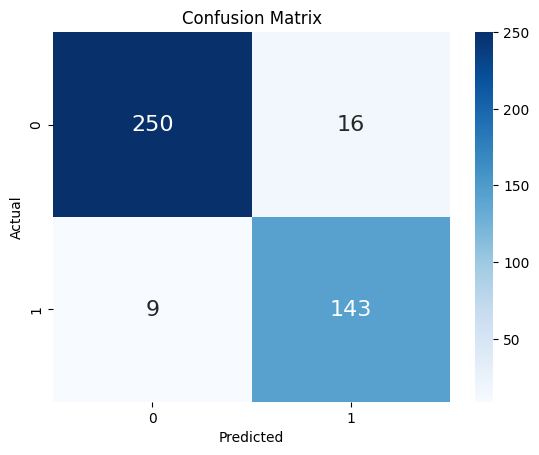

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=42)
rfc.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [45]:
Y_pred_2=rfc.predict(X_test)
conf_matrix_2=confusion_matrix(Y_test, Y_pred_2)
score=metrics.accuracy_score(Y_pred, Y_test)
score2=metrics.accuracy_score(Y_pred_2, Y_test)
print(score)
print(score2)

0.9401913875598086
0.8492822966507177


In [46]:
rfc = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=42)
rfc.fit(X_train, Y_train)
Y_pred_2=rfc.predict(X_test)
conf_matrix_2=confusion_matrix(Y_test, Y_pred_2)
score2=metrics.accuracy_score(Y_pred_2, Y_test)
print(score2)

0.8421052631578947
